In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [41]:
#download dataset from https://www.kaggle.com/wkirgsn/electric-motor-temperature
data = pd.read_csv("pmsm_temperature_data.csv")

In [42]:
data.head()

,ambient,coolant,u_d,u_q,motor_speed,torque,i_d,i_q,pm,stator_yoke,stator_tooth,stator_winding,profile_id
0,-0.752143,-1.118446,0.327935,-1.297858,-1.222428,-0.250182,1.029572,-0.245860,-2.522071,-1.831422,-2.066143,-2.018033,4
1,-0.771263,-1.117021,0.329665,-1.297686,-1.222429,-0.249133,1.029509,-0.245832,-2.522418,-1.830969,-2.064859,-2.017631,4
2,-0.782892,-1.116681,0.332771,-1.301822,-1.222428,-0.249431,1.029448,-0.245818,-2.522673,-1.830400,-2.064073,-2.017343,4
3,-0.780935,-1.116764,0.333700,-1.301852,-1.222430,-0.248636,1.032845,-0.246955,-2.521639,-1.830333,-2.063137,-2.017632,4
4,-0.774043,-1.116775,0.335206,-1.303118,-1.222429,-0.248701,1.031807,-0.246610,-2.521900,-1.830498,-2.062795,-2.018145,4


In [43]:
data.shape

(998070, 13)

In [44]:
data.dtypes.value_counts()

float64    12
int64       1
dtype: int64

In [45]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 998070 entries, 0 to 998069
Data columns (total 13 columns):
ambient           998070 non-null float64
coolant           998070 non-null float64
u_d               998070 non-null float64
u_q               998070 non-null float64
motor_speed       998070 non-null float64
torque            998070 non-null float64
i_d               998070 non-null float64
i_q               998070 non-null float64
pm                998070 non-null float64
stator_yoke       998070 non-null float64
stator_tooth      998070 non-null float64
stator_winding    998070 non-null float64
profile_id        998070 non-null int64
dtypes: float64(12), int64(1)
memory usage: 99.0 MB


In [46]:
target_features = ['pm', 'stator_tooth', 'stator_yoke', 'stator_winding']

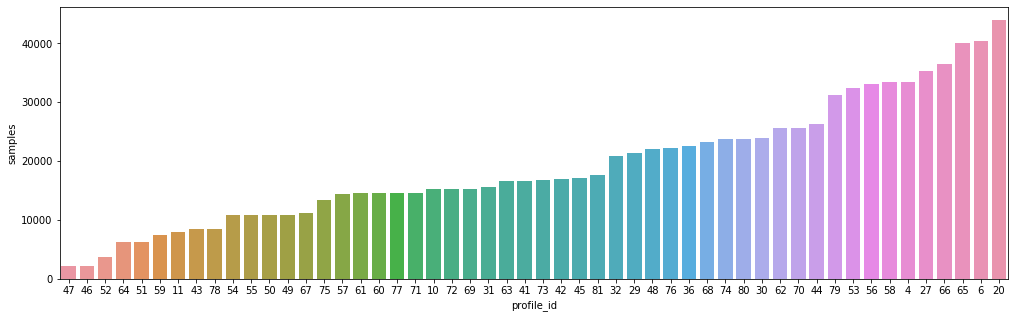

In [47]:
fig = plt.figure(figsize=(17, 5))
grpd = data.groupby(['profile_id'])
df = grpd.size().sort_values().rename('samples').reset_index()
ordered_ids = df.profile_id.values.tolist()
sns.barplot(y='samples', x='profile_id', data=df, order=ordered_ids)

In [48]:
grpd.size()

profile_id
4     33423
6     40387
10    15255
11     7886
20    43970
27    35360
29    21357
30    23862
31    15586
32    20959
36    22608
41    16699
42    16919
43     8442
44    26340
45    17141
46     2179
47     2175
48    21982
49    10815
50    10809
51     6260
52     3725
53    32441
54    10806
55    10806
56    33122
57    14402
58    33381
59     7474
60    14542
61    14515
62    25599
63    16667
64     6249
65    40093
66    36475
67    11134
68    23330
69    15349
70    25676
71    14655
72    15300
73    16785
74    23760
75    13471
76    22187
77    14621
78     8444
79    31153
80    23823
81    17671
dtype: int64

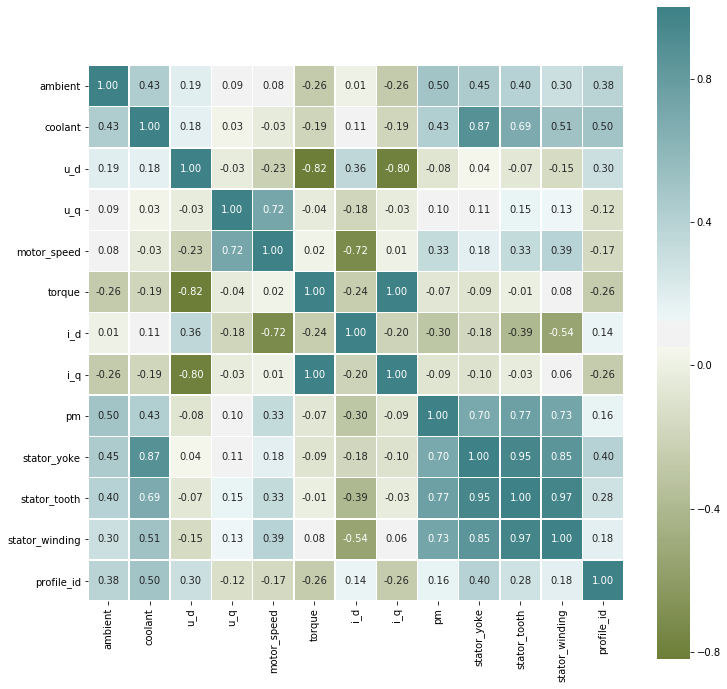

In [52]:
#correlation map
f,ax=plt.subplots(figsize=(12,12))
corr=data.corr()

sns.heatmap(corr, annot=True, linewidths=.5, fmt='.2f', mask= np.zeros_like(corr,dtype=np.bool),
            cmap=sns.diverging_palette(100,200,as_cmap=True), square=True, ax=ax)

plt.show()

#There are high correlation between values

In [53]:
a=data[['pm','stator_yoke','stator_tooth','stator_winding']]
b=data[['torque','i_q','u_d']]
d=data[['ambient','coolant','u_q','motor_speed','i_d']]

In [56]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents_a = pca.fit_transform(a)
principalDf_a = pd.DataFrame(data = principalComponents_a
             , columns = ['principal component a_1', 'principal component a_2'])

In [57]:
from sklearn.decomposition import PCA
pca = PCA(n_components=1)
principalComponents_b = pca.fit_transform(b)
principalDf_b = pd.DataFrame(data = principalComponents_b
             , columns = ['principal component b_1'])

In [58]:
c= pd.concat([principalDf_a, principalDf_b], axis = 1)

In [59]:
c.head()

,principal component a_1,principal component a_2,principal component b_1
0,-4.183849,0.710603,0.466638
1,-4.182892,0.711435,0.466947
2,-4.182157,0.712094,0.468818
3,-4.181306,0.711346,0.469524
4,-4.181587,0.711486,0.470185


In [60]:
final=pd.concat([c, d], axis=1)

In [61]:
final.head()

,principal component a_1,principal component a_2,principal component b_1,ambient,coolant,u_q,motor_speed,i_d
0,-4.183849,0.710603,0.466638,-0.752143,-1.118446,-1.297858,-1.222428,1.029572
1,-4.182892,0.711435,0.466947,-0.771263,-1.117021,-1.297686,-1.222429,1.029509
2,-4.182157,0.712094,0.468818,-0.782892,-1.116681,-1.301822,-1.222428,1.029448
3,-4.181306,0.711346,0.469524,-0.780935,-1.116764,-1.301852,-1.222430,1.032845
4,-4.181587,0.711486,0.470185,-0.774043,-1.116775,-1.303118,-1.222429,1.031807


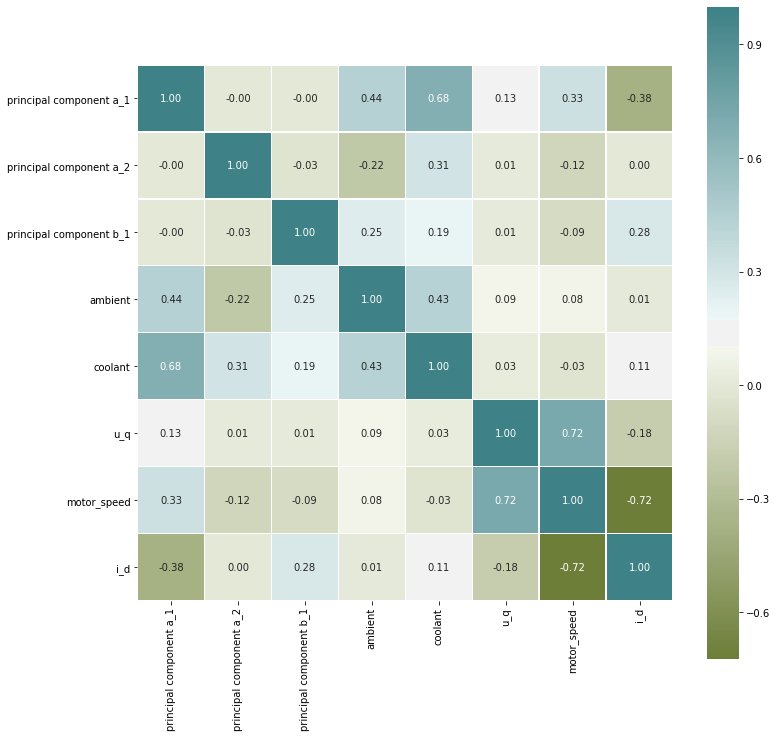

In [63]:
#correlation map
f,ax=plt.subplots(figsize=(12,12))
corr=final.corr()

sns.heatmap(corr, annot=True, linewidths=.5, fmt='.2f', mask= np.zeros_like(corr,dtype=np.bool), 
            cmap=sns.diverging_palette(100,200,as_cmap=True), square=True, ax=ax)

plt.show()

In [64]:
data.head()

,ambient,coolant,u_d,u_q,motor_speed,torque,i_d,i_q,pm,stator_yoke,stator_tooth,stator_winding,profile_id
0,-0.752143,-1.118446,0.327935,-1.297858,-1.222428,-0.250182,1.029572,-0.245860,-2.522071,-1.831422,-2.066143,-2.018033,4
1,-0.771263,-1.117021,0.329665,-1.297686,-1.222429,-0.249133,1.029509,-0.245832,-2.522418,-1.830969,-2.064859,-2.017631,4
2,-0.782892,-1.116681,0.332771,-1.301822,-1.222428,-0.249431,1.029448,-0.245818,-2.522673,-1.830400,-2.064073,-2.017343,4
3,-0.780935,-1.116764,0.333700,-1.301852,-1.222430,-0.248636,1.032845,-0.246955,-2.521639,-1.830333,-2.063137,-2.017632,4
4,-0.774043,-1.116775,0.335206,-1.303118,-1.222429,-0.248701,1.031807,-0.246610,-2.521900,-1.830498,-2.062795,-2.018145,4


In [65]:
data=df.drop(columns=['profile_id'])

In [66]:
#splitting dependent variable and independent variable
data_x=final.drop(["motor_speed"],axis=1)
data_y=pd.DataFrame(final['motor_speed']) #motor_speed is dependent variable.

In [67]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score,mean_squared_error

## MULTIPLE LINEAR REGRESSION

In [82]:
#splitting dataset into training set and test set
x_train, x_test, y_train, y_test = train_test_split(data_x,data_y, test_size=0.33,random_state = 0)

regression = LinearRegression()
regression.fit(x_train,y_train)

y_pred = regression.predict(x_train)

accuracy = regression.score(x_test,y_test)

In [83]:
print("Multiple Linear Regression Accuracy Score :",accuracy)

Multiple Linear Regression Accuracy Score : 0.9043704802490876


## POLYNOMIAL REGRESSION

In [101]:
poly = PolynomialFeatures (degree = 2)
x_poly = poly.fit_transform(data_x)

X_train,X_test,Y_train,Y_test = train_test_split(x_poly,data_y, random_state = 0)

plr = LinearRegression().fit(X_train,Y_train)

Y_train_pred = plr.predict(X_train)
Y_test_pred = plr.predict(X_test)

acc =plr.score(X_test,Y_test)

print('Polynomial Linear Regression:' ,acc)

Polynomial Linear Regression: 0.9848070676859103


## Decision Tree Regression

Training:0.9575472161912014


Test:0.9574449330592066


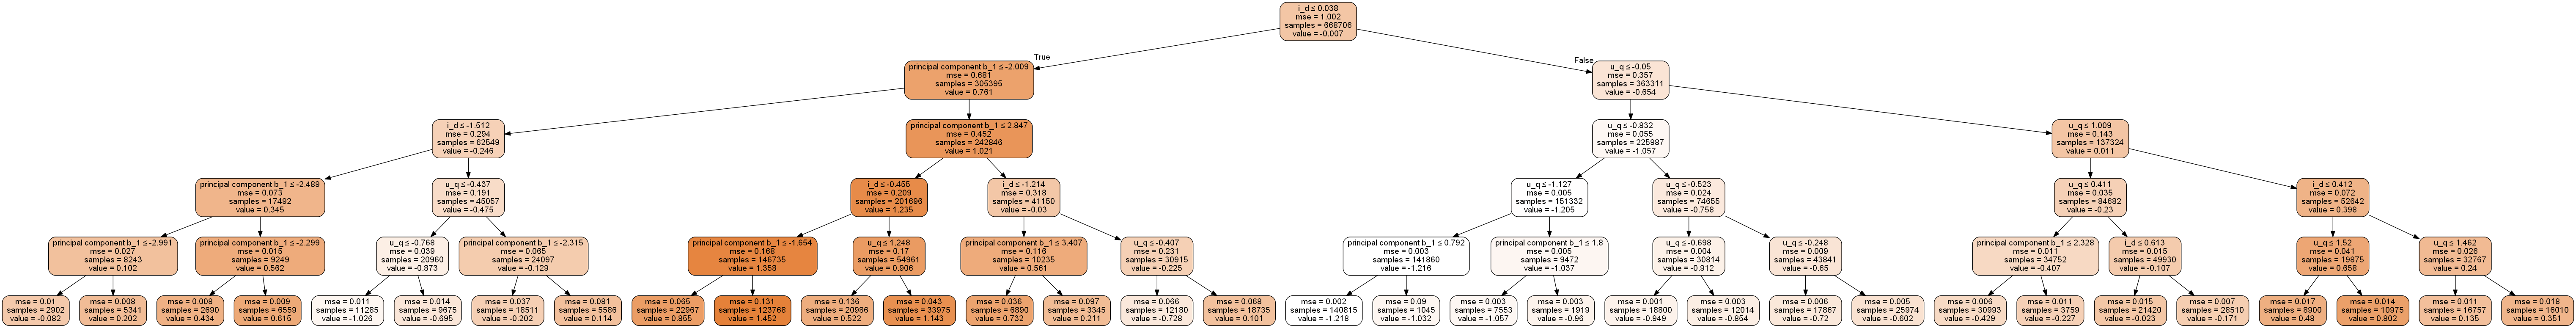

In [100]:
from sklearn.tree import DecisionTreeRegressor,export_graphviz
from sklearn.metrics import accuracy_score,recall_score,precision_score,confusion_matrix,f1_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.externals.six import StringIO 
from IPython.display import Image  
import pydotplus

#fitting train data and test data
d_tree = DecisionTreeRegressor(max_depth=5)
d_tree.fit(x_train,y_train)

print("Training:"+str(d_tree.score(x_train,y_train)))
print("\n")
print("Test:"+str(d_tree.score(x_test,y_test)))

dot_data = StringIO()
feat_names = data_x.columns
targ_names = ['Yes','No']

export_graphviz(d_tree, out_file=dot_data,
                feature_names=feat_names,
                class_names=targ_names,
                filled=True, rounded=True,
                special_characters=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('result.png')
Image(graph.create_png())

